In [11]:
import os 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# import pyClimat models
from pyClimat.data import read_ECHAM_processed
from pyClimat.analysis import extract_var, compute_lterm_mean, compute_lterm_diff
from pyClimat.plot_utils import *
from pyClimat.plots import plot_annual_mean


In [12]:
# paths 
module_output_main_path = "/home/dboateng/Model_output_pst"
exp_name_aw100e100 = "a002_hpc-bw_e5w2.3_t159_PI_Alps_east_100_t159l31.6h"
exp_name_miow100e100_278ppm_frigola = "a011_hpc-bw_e5w2.3_t159_MIO_278ppm_CTL_t159l31.6h"
exp_name_miow100e100_450ppm_frigola = "a013_hpc-bw_e5w2.3_t159_MIO_450ppm_CTL_t159l31.6h"
exp_name_miow100e100_450ppm_herold = "a014_hpc-bw_e5w2.3_t159_MIO_W1E1_450ppm_t159l31.6h"

In [13]:
# read dataset
# for supplementary (same but for annual)
years= "1003_1017"
period = "1m"


# reading dataset
aw1e1_data, aw1e1_wiso = read_ECHAM_processed(main_path=module_output_main_path , exp_name= exp_name_aw100e100, years=years,
                                                  period=period)
miow1e1_data_fri, miow1e1_wiso_fri = read_ECHAM_processed(main_path=module_output_main_path , exp_name= exp_name_miow100e100_278ppm_frigola, years=years,
                                                  period=period)
miow1e1_450_data_fri, miow1e1_450_wiso_fri = read_ECHAM_processed(main_path=module_output_main_path , exp_name= exp_name_miow100e100_450ppm_frigola, years=years,
                                                  period=period)
miow1e1_450_data, miow1e1_450_wiso = read_ECHAM_processed(main_path=module_output_main_path , exp_name= exp_name_miow100e100_450ppm_herold, years=years,
                                                  period=period)

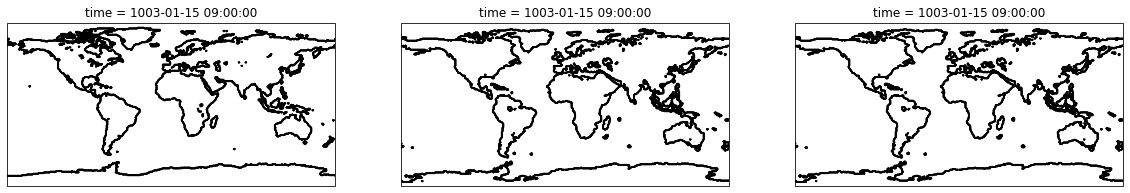

In [20]:
# plot the land-sea mask for all the experiments

#Pre-industrial
projection = ccrs.PlateCarree()
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 17), sharex=False,
                                                sharey=False, subplot_kw={"projection":  projection})
slm_pi =aw1e1_data.slm[0]
mio_fri = miow1e1_data_fri.slm[0]
mio_her = miow1e1_450_data.slm[0]
slm_pi.plot.contour(colors='k', linestyles='-', ax=ax1, transform=projection)
mio_fri.plot.contour(colors='k', linestyles='-', ax=ax2, transform=projection)
mio_her.plot.contour(colors='k', linestyles='-', ax=ax3, transform=projection)

In [21]:

#  extracting variables
 
#aw100e100
temp2_aw1e1 = extract_var(Dataset=aw1e1_data , varname="temp2", units="°C")
prec_aw1e1 = extract_var(Dataset= aw1e1_data , varname="prec", units="mm/month")
d18op_aw1e1 = extract_var(Dataset=aw1e1_data , varname="d18op", units="per mil", Dataset_wiso= aw1e1_wiso)
u10_aw1e1 = extract_var(Dataset=aw1e1_data , varname="u10")
v10_aw1e1 = extract_var(Dataset=aw1e1_data , varname="v10")

#miow100e100
temp2_miow1e1 = extract_var(Dataset=miow1e1_data_fri , varname="temp2", units="°C")
prec_miow1e1 = extract_var(Dataset= miow1e1_data_fri , varname="prec", units="mm/month")
d18op_miow1e1 = extract_var(Dataset=miow1e1_data_fri , varname="d18op", units="per mil", Dataset_wiso= miow1e1_wiso_fri)
u10_miow1e1 = extract_var(Dataset=miow1e1_data_fri , varname="u10")
v10_miow1e1 = extract_var(Dataset=miow1e1_data_fri , varname="v10")

#miow1e1450 Fri
temp2_miow1e1_450_fri = extract_var(Dataset=miow1e1_450_data_fri , varname="temp2", units="°C")
prec_miow1e1_450_fri = extract_var(Dataset= miow1e1_450_data_fri , varname="prec", units="mm/month")
d18op_miow1e1_450_fri = extract_var(Dataset=miow1e1_450_data_fri , varname="d18op", units="per mil", Dataset_wiso= miow1e1_450_wiso_fri)
u10_miow1e1_450_fri = extract_var(Dataset=miow1e1_450_data_fri , varname="u10")
v10_miow1e1_450_fri = extract_var(Dataset=miow1e1_450_data_fri , varname="v10")

#miow1e1450
temp2_miow1e1_450 = extract_var(Dataset=miow1e1_450_data , varname="temp2", units="°C")
prec_miow1e1_450 = extract_var(Dataset= miow1e1_450_data , varname="prec", units="mm/month")
d18op_miow1e1_450 = extract_var(Dataset=miow1e1_450_data , varname="d18op", units="per mil", Dataset_wiso= miow1e1_450_wiso)
u10_miow1e1_450 = extract_var(Dataset=miow1e1_450_data , varname="u10")
v10_miow1e1_450 = extract_var(Dataset=miow1e1_450_data , varname="v10")

In [22]:
# compute annual means and difference
# PI
temp2_aw1e1_alt = compute_lterm_mean(data=temp2_aw1e1, time="annual")
prec_aw1e1_alt = compute_lterm_mean(data=prec_aw1e1,  time="annual")
d18op_aw1e1_alt = compute_lterm_mean(data=d18op_aw1e1, time="annual")
u10_aw1e1_alt = compute_lterm_mean(data=u10_aw1e1, time="annual")
v10_aw1e1_alt = compute_lterm_mean(data=v10_aw1e1, time="annual")

#mio winds

u10_miow1e1_alt = compute_lterm_mean(data=u10_miow1e1, time="annual")
v10_miow1e1_alt = compute_lterm_mean(data=v10_miow1e1, time="annual")


#mio450 winds
u10_miow1e1_alt_450_fri = compute_lterm_mean(data=u10_miow1e1_450_fri, time="annual")
v10_miow1e1_alt_450_fri = compute_lterm_mean(data=v10_miow1e1_450_fri, time="annual")


u10_miow1e1_alt_450 = compute_lterm_mean(data=u10_miow1e1_450, time="annual")
v10_miow1e1_alt_450 = compute_lterm_mean(data=v10_miow1e1_450, time="annual")

Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed


In [23]:
# compute mean difference for Mio278 - PI
temp2_alt = compute_lterm_diff(data_control= temp2_aw1e1, data_main=temp2_miow1e1, time="annual")
prec_alt = compute_lterm_diff(data_control= prec_aw1e1, data_main=prec_miow1e1, time="annual")
d18op_alt = compute_lterm_diff(data_control= d18op_aw1e1, data_main=d18op_miow1e1, time="annual")

# compute mean difference for Mio450 - PI
temp2_alt_450_fri = compute_lterm_diff(data_control= temp2_aw1e1, data_main=temp2_miow1e1_450_fri, time="annual")
prec_alt_450_fri = compute_lterm_diff(data_control= prec_aw1e1, data_main=prec_miow1e1_450_fri, time="annual")
d18op_alt_450_fri = compute_lterm_diff(data_control= d18op_aw1e1, data_main=d18op_miow1e1_450_fri, time="annual")

# compute mean difference for Mio450 - PI
temp2_alt_450 = compute_lterm_diff(data_control= temp2_aw1e1, data_main=temp2_miow1e1_450, time="annual")
prec_alt_450 = compute_lterm_diff(data_control= prec_aw1e1, data_main=prec_miow1e1_450, time="annual")
d18op_alt_450 = compute_lterm_diff(data_control= d18op_aw1e1, data_main=d18op_miow1e1_450, time="annual")

Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the an

The output would not be save on directory
The output would not be save on directory
The output would not be save on directory


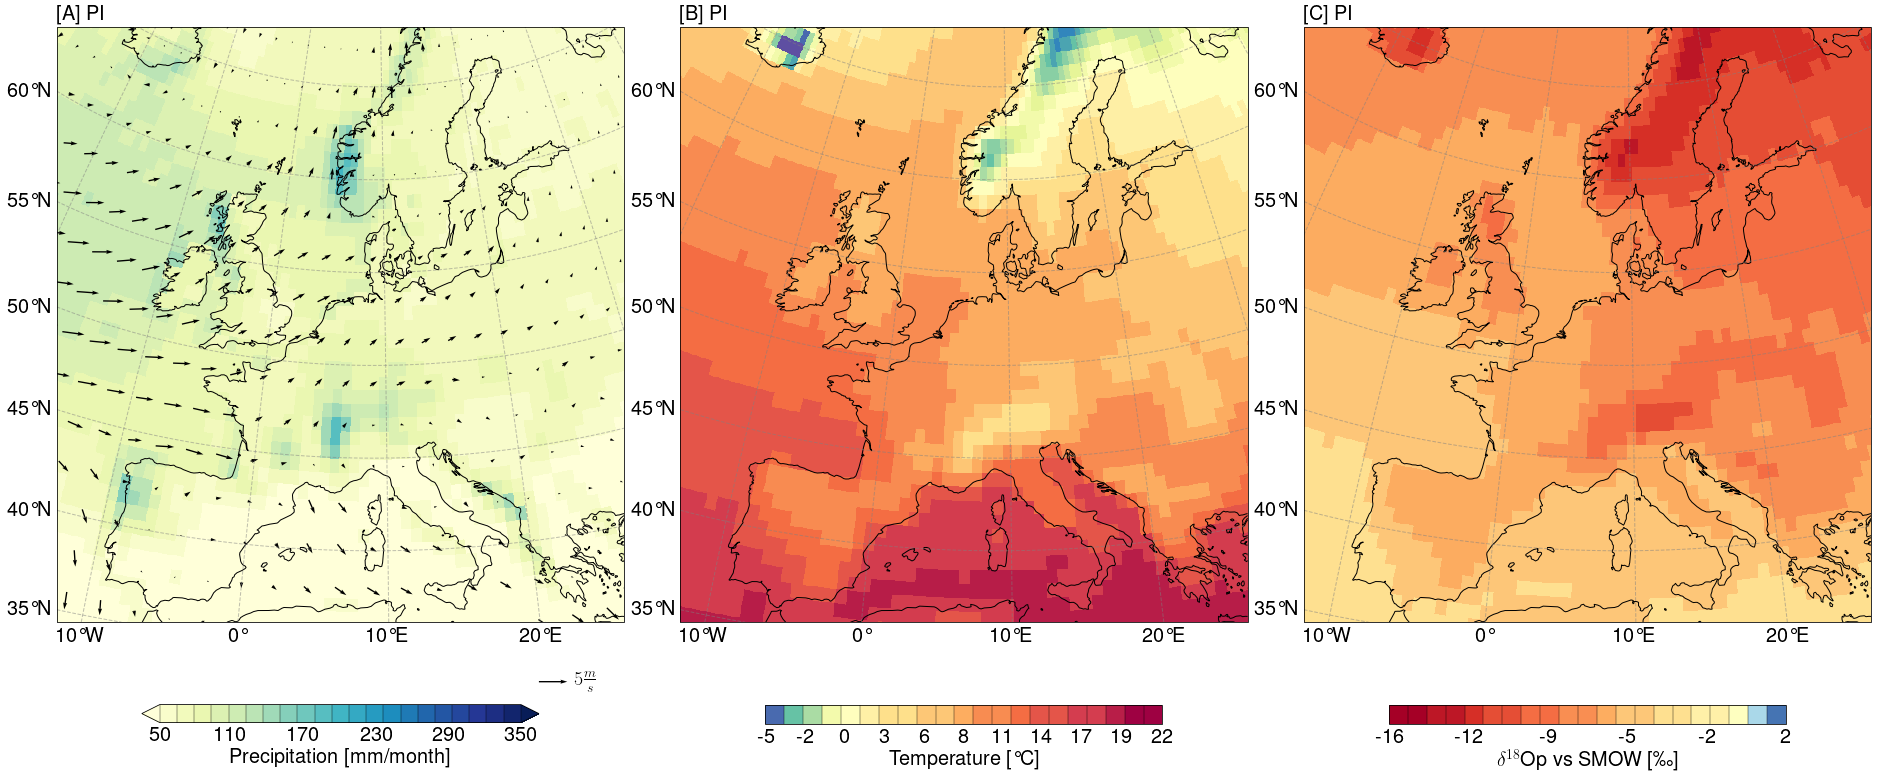

In [24]:
import cartopy.crs as ccrs
# plot PI
projection = ccrs.EuroPP()
apply_style(fontsize=22, style=None, linewidth=2) 
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation", data_alt=prec_aw1e1_alt, cmap=YlGnBu, units="mm/month", vmax=350, vmin=50, domain="Europe", 
                  levels=22, level_ticks=6, title="[A] PI", left_labels=True, bottom_labels=True, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_aw1e1_alt, data_v=v10_aw1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature", data_alt=temp2_aw1e1_alt, cmap=Spectral_r, units="°C", vmax=22, vmin=-5, domain="Europe", 
                  levels=22, level_ticks=11, title="[B] PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op vs SMOW', data_alt=d18op_aw1e1_alt, cmap=RdYlBu, units="‰", vmax=2, vmin=-16, domain="Europe", 
                  levels=22, level_ticks=6, title="[C] PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()

using the Frigola BC
The output would not be save on directory
The output would not be save on directory
The output would not be save on directory


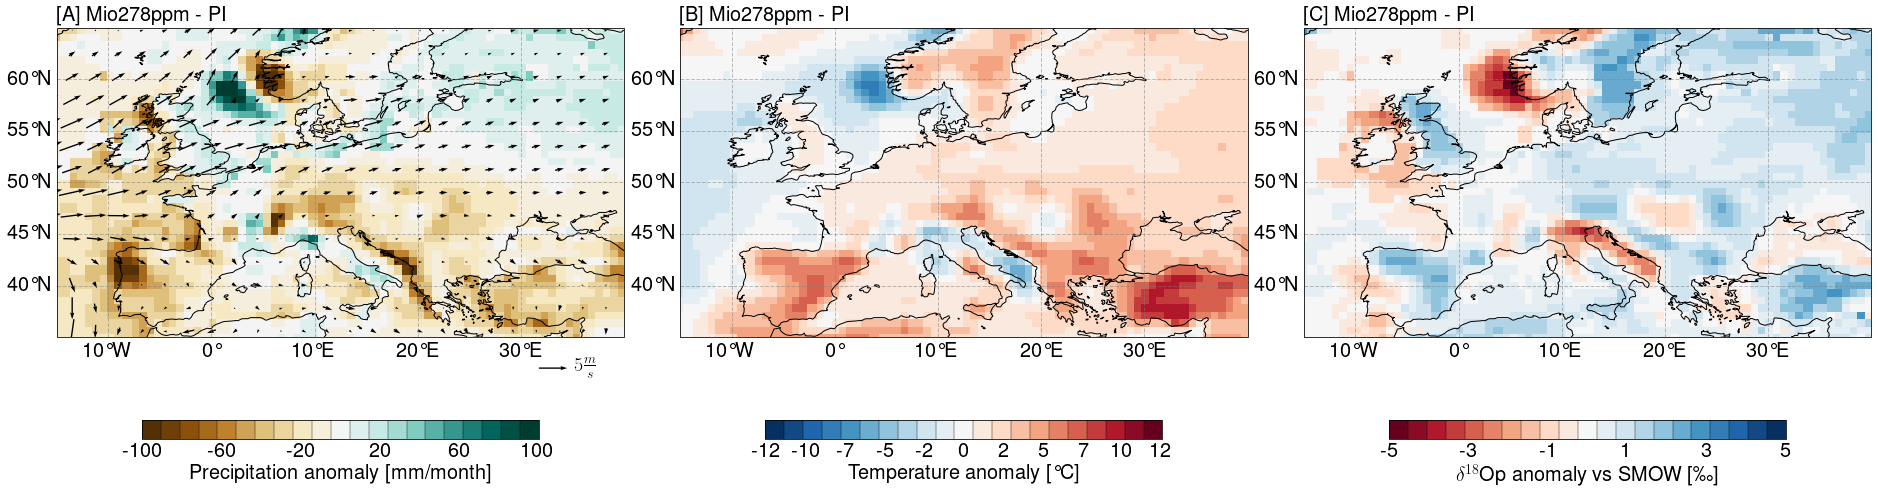

In [25]:
# plot difference
projection =  ccrs.PlateCarree(central_longitude=10)
#projection = ccrs.EuroPP()
apply_style(fontsize=22, style=None, linewidth=2) 
print("using the Frigola BC")
    
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation anomaly", data_alt=prec_alt, cmap=BrBG, units="mm/month", vmax=100, vmin=-100, domain="Europe", 
                  levels=22, level_ticks=6, title="[A] Mio278ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_miow1e1_alt, data_v=v10_miow1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature anomaly", data_alt=temp2_alt, cmap=RdBu_r, units="°C", vmax=12, vmin=-12, domain="Europe", 
                  levels=22, level_ticks=11, title="[B] Mio278ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op anomaly vs SMOW', data_alt=d18op_alt, cmap=RdBu, units="‰", vmax=5, vmin=-5, domain="Europe", 
                  levels=22, level_ticks=6, title="[C] Mio278ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()

The output would not be save on directory
The output would not be save on directory
The output would not be save on directory


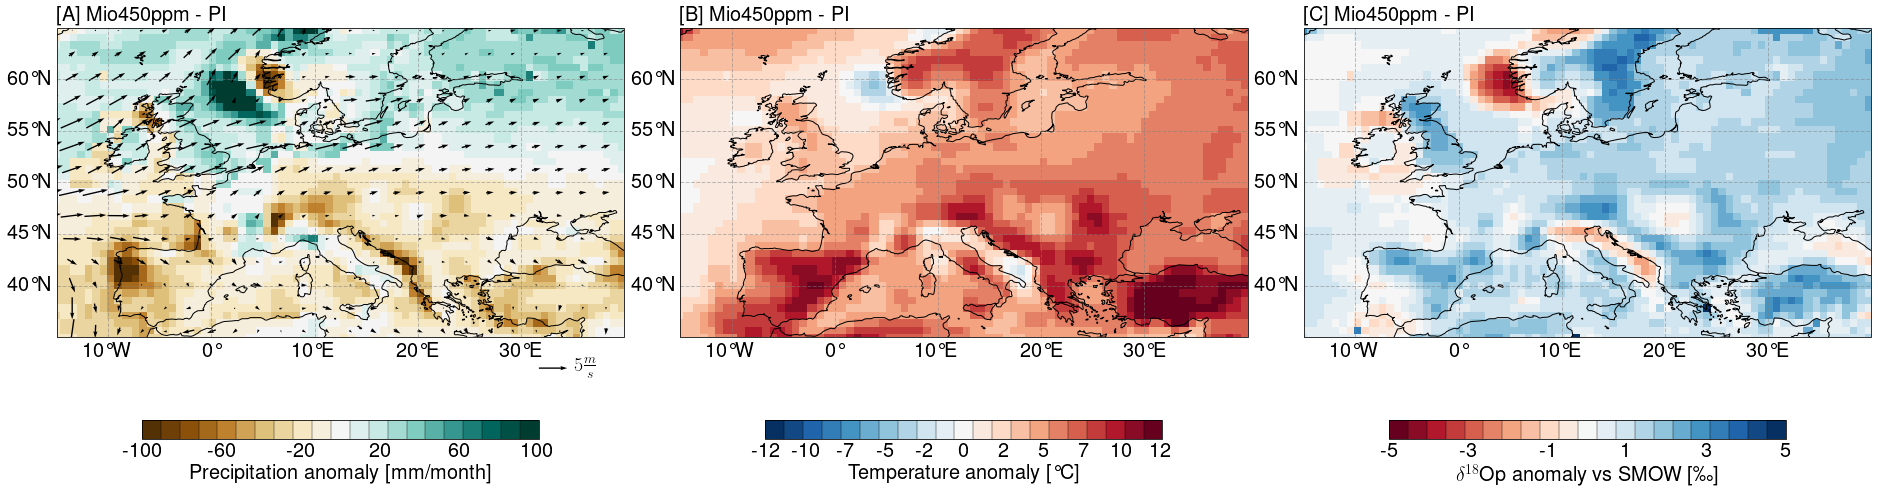

In [26]:
# plot difference
projection = ccrs.PlateCarree(central_longitude=10)
apply_style(fontsize=22, style=None, linewidth=2) 
    
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation anomaly", data_alt=prec_alt_450_fri, cmap=BrBG, units="mm/month", vmax=100, vmin=-100, domain="Europe", 
                  levels=22, level_ticks=6, title="[A] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_miow1e1_alt, data_v=v10_miow1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature anomaly", data_alt=temp2_alt_450_fri, cmap=RdBu_r, units="°C", vmax=12, vmin=-12, domain="Europe", 
                  levels=22, level_ticks=11, title="[B] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op anomaly vs SMOW', data_alt=d18op_alt_450_fri, cmap=RdBu, units="‰", vmax=5, vmin=-5, domain="Europe", 
                  levels=22, level_ticks=6, title="[C] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()

The output would not be save on directory
The output would not be save on directory
The output would not be save on directory


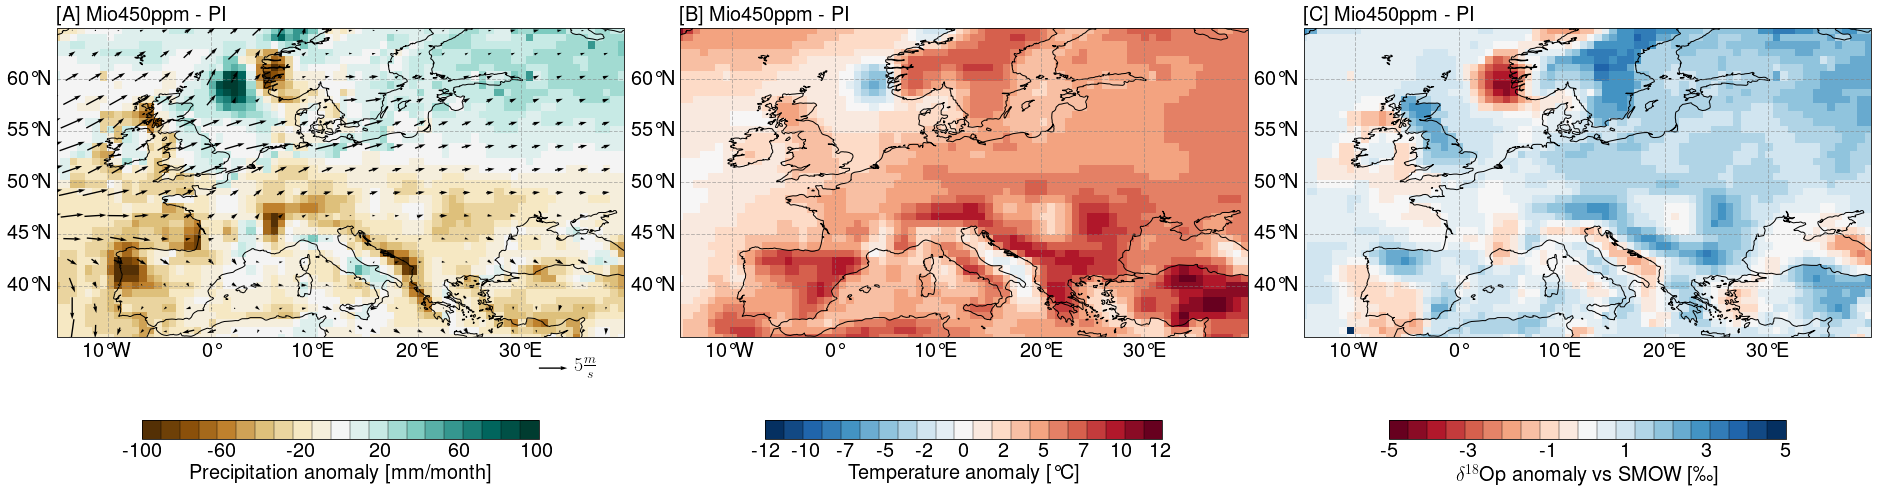

In [27]:
# plot difference
projection = ccrs.PlateCarree(central_longitude=10)
apply_style(fontsize=22, style=None, linewidth=2) 
    
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation anomaly", data_alt=prec_alt_450, cmap=BrBG, units="mm/month", vmax=100, vmin=-100, domain="Europe", 
                  levels=22, level_ticks=6, title="[A] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_miow1e1_alt, data_v=v10_miow1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature anomaly", data_alt=temp2_alt_450, cmap=RdBu_r, units="°C", vmax=12, vmin=-12, domain="Europe", 
                  levels=22, level_ticks=11, title="[B] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op anomaly vs SMOW', data_alt=d18op_alt_450, cmap=RdBu, units="‰", vmax=5, vmin=-5, domain="Europe", 
                  levels=22, level_ticks=6, title="[C] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()

The output would not be save on directory
The output would not be save on directory
The output would not be save on directory


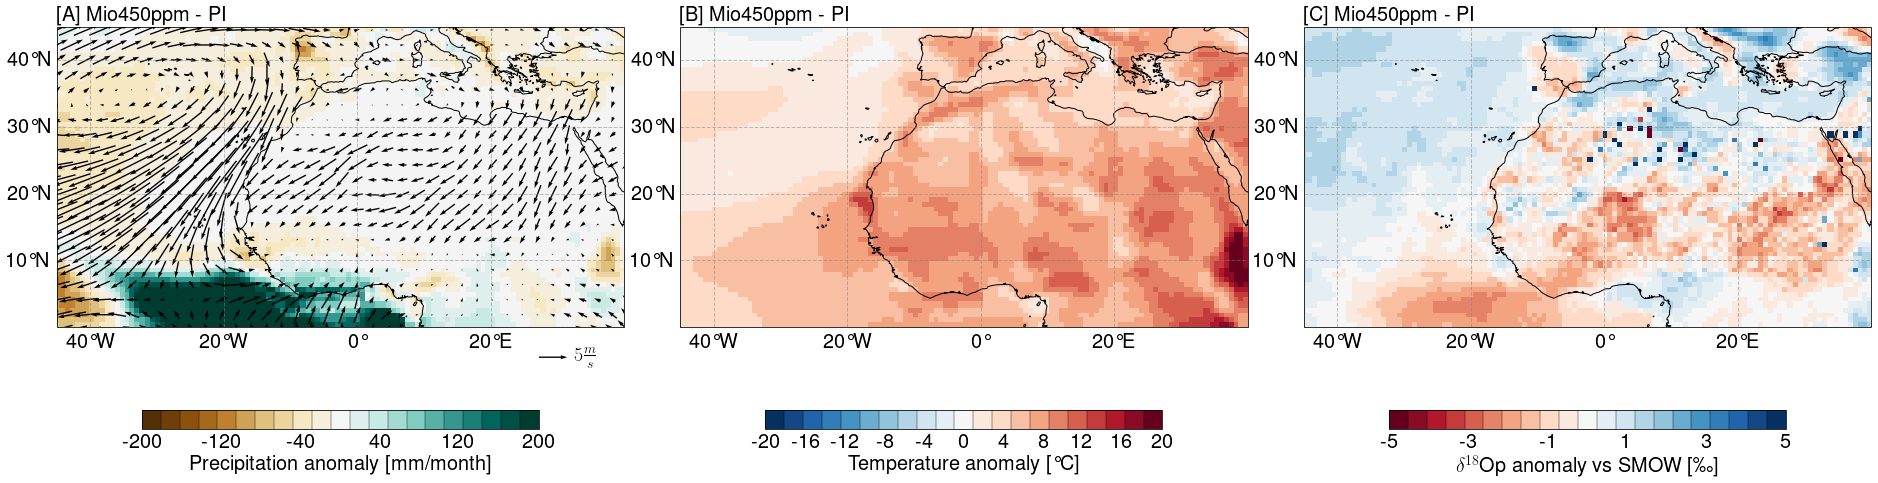

In [28]:
# plot difference
projection = ccrs.PlateCarree(central_longitude=10)
apply_style(fontsize=22, style=None, linewidth=2) 
    
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation anomaly", data_alt=prec_alt_450, cmap=BrBG, units="mm/month", vmax=200, vmin=-200, domain="West Africa Wide", 
                  levels=22, level_ticks=6, title="[A] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_miow1e1_alt, data_v=v10_miow1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature anomaly", data_alt=temp2_alt_450, cmap=RdBu_r, units="°C", vmax=20, vmin=-20, domain="West Africa Wide", 
                  levels=22, level_ticks=11, title="[B] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op anomaly vs SMOW', data_alt=d18op_alt_450, cmap=RdBu, units="‰", vmax=5, vmin=-5, domain="West Africa Wide", 
                  levels=22, level_ticks=6, title="[C] Mio450ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()